In [2]:
import keras
from keras import layers

from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [3]:
input = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = keras.Model(input, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')



In [17]:
(x_train,_), (x_test,_) = mnist.load_data()

NameError: name 'fans' is not defined

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(x_train, x_train, epochs=50, validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1523 - val_loss: 0.1150
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1093 - val_loss: 0.1026
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1007 - val_loss: 0.0970
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0960 - val_loss: 0.0938
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0933 - val_loss: 0.0913
Epoch 6/50
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0914 - val_loss: 0.0893
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0900 - val_loss: 0.0886
Epoch 8/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0888 - val_loss: 0.0871
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0877 - val_loss: 0.0866
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.086

In [12]:
decoded_imgs = autoencoder.predict(x_test)

  1/313 [..............................] - ETA: 6s

313/313 [==============================] - 0s 870us/step


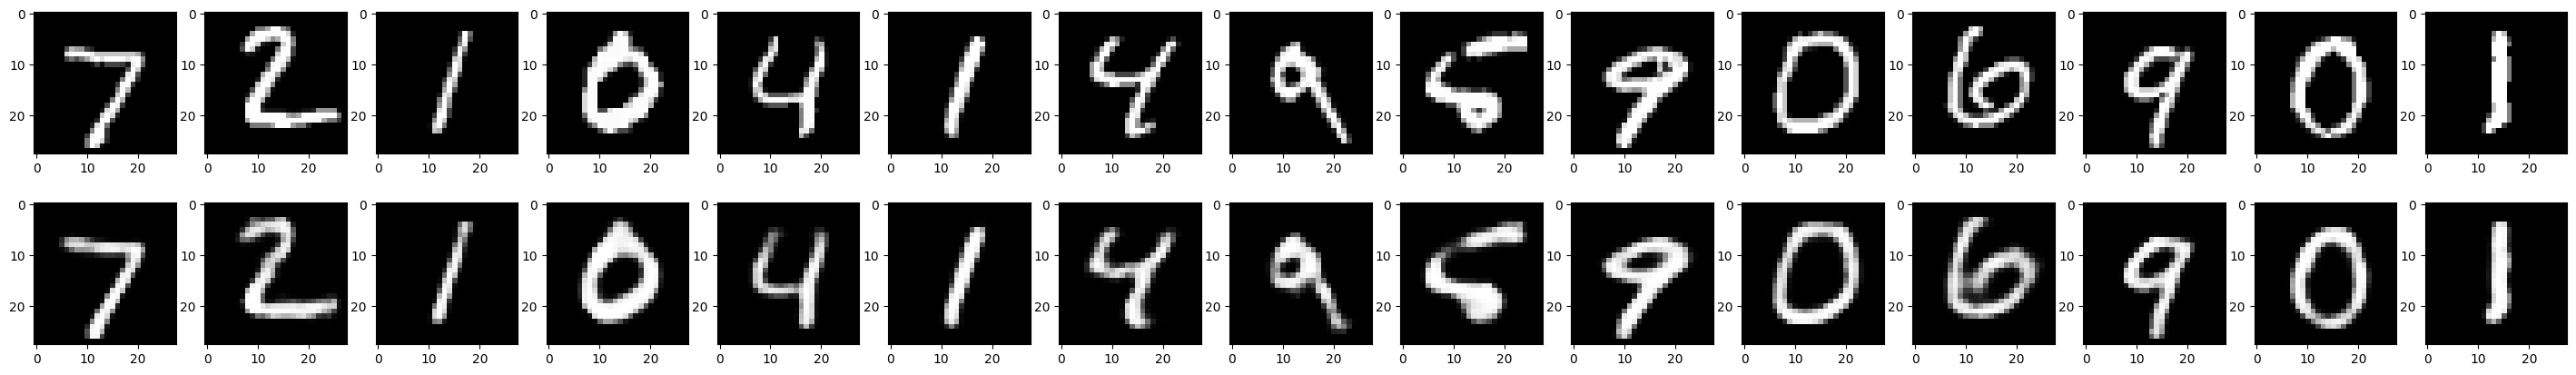

In [13]:
n=15
plt.figure(figsize=(36, 5))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
plt.show()

In [14]:
random_noise = np.random.random_sample((784,))

random = np.array([random_noise])

In [15]:
decoded_image = autoencoder.predict(random)

1/1 [==============================] - 0s 16ms/step


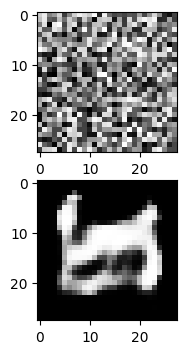

In [16]:
n=1
plt.figure(figsize=(4, 4))
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(random[i].reshape(28, 28))
    plt.gray()
    
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(decoded_image[i].reshape(28, 28))
    plt.gray()
    
plt.show()